# Assignment 2

In [37]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [6]:
sst = xr.open_dataset("SST_2022.nc")
sss = xr.open_dataset("SSS_2022.nc")

In [7]:
sst

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, lon: 240, lat: 100)
Coordinates:
  * time       (time) datetime64[ns] 2022-01-16 ... 2022-12-16
  * lon        (lon) float32 40.12 40.38 40.62 40.88 ... 99.12 99.38 99.62 99.88
  * lat        (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    sst        (time, lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.9rc1 (https://mpimet.m...
    Conventions:    CF-1.5
    history:        Wed Mar 06 11:50:23 2024: cdo monmean SST_2022.nc 0.nc\nW...
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    institution:    NOAA/National Centers for Environmental Information
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...
    frequency:      mon
    CDO:            Climate Data Operators version 1.9.9rc1 (https://mpimet.m...

In [8]:
sss

<xarray.Dataset>
Dimensions:    (time: 12, longitude: 240, latitude: 100)
Coordinates:
  * time       (time) datetime64[ns] 2022-01-15 2022-02-15 ... 2022-12-15
  * longitude  (longitude) float32 40.12 40.38 40.62 40.88 ... 99.38 99.62 99.88
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 24.38 24.62 24.88
Data variables:
    sss        (time, latitude, longitude) float32 ...
Attributes: (12/46)
    CDI:                           Climate Data Interface version 1.9.9rc1 (h...
    Conventions:                   CF-1.8, ACDD-1.3
    history:                       Wed Mar 06 11:31:08 2024: cdo mergetime OI...
    source:                        Aquarius V5.0 Level 2 SSS; SMAP RSS V5.0 L...
    standard_name_vocabulary:      CF Standard Name Table v27
    Title:                         Multi-Mission Optimally Interpolated Sea S...
    ...                            ...
    geospatial_lon_min:            -180.0
    geospatial_lon_max:            180.0
    geospatial_lon_resolution:     0.25
    geospatial_lon_units:          degrees_east
    NCO:                           netCDF Operators version 4.9.1 (Homepage =...
    CDO:                           Climate Data Operators version 1.9.9rc1 (h...

## SST Seasonal Mean

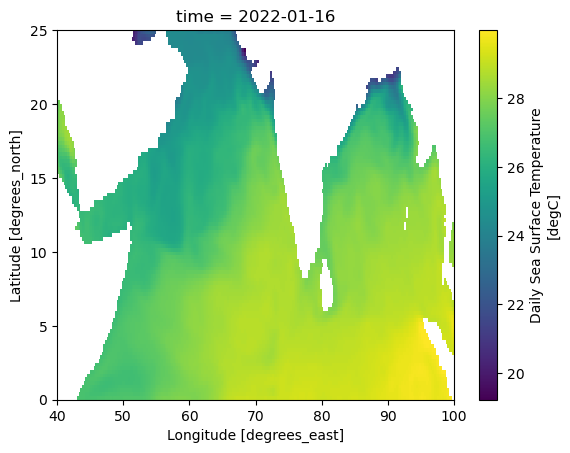

In [9]:
sst["sst"].isel(time=0).plot()

In [10]:
sst_spring = sst.sel(time=slice('2022-01-01', '2022-04-30')).mean('time')
sst_summer = sst.sel(time=slice('2022-05-01', '2022-08-31')).mean('time')
sst_winter = sst.sel(time=slice('2022-09-01', '2022-12-31')).mean('time')

In [36]:
sst_spring

<xarray.Dataset>
Dimensions:  (lon: 240, lat: 100)
Coordinates:
  * lon      (lon) float32 40.12 40.38 40.62 40.88 ... 99.12 99.38 99.62 99.88
  * lat      (lat) float32 0.125 0.375 0.625 0.875 ... 24.12 24.38 24.62 24.88
Data variables:
    sst      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

Text(0, 0.5, 'Latitude')

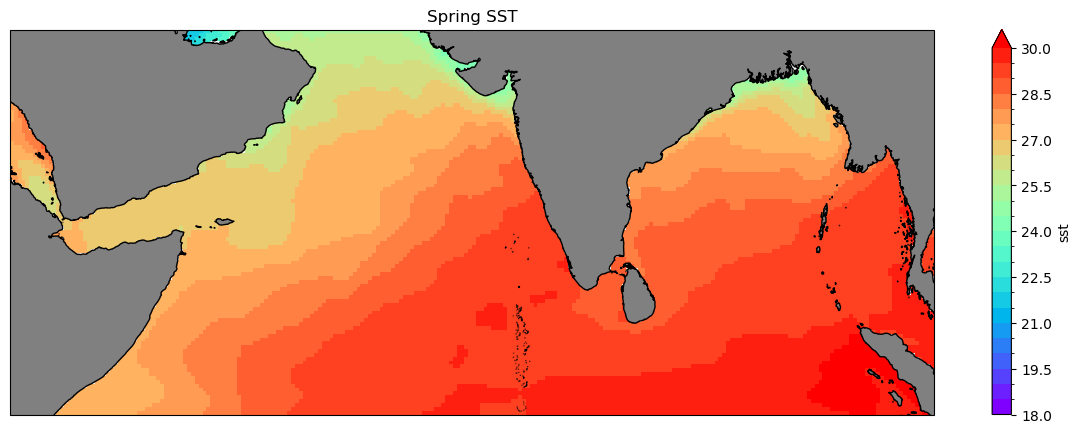

In [98]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
sst_spring.sst.plot(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(18,30,25), cmap="rainbow"
)

coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Spring SST")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


Text(0, 0.5, 'Latitude')

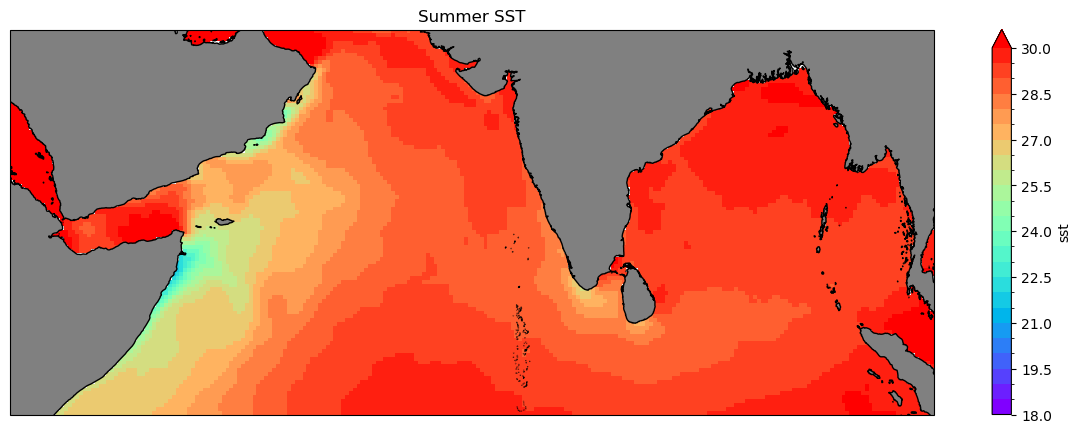

In [99]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
sst_summer.sst.plot(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(18,30,25), cmap="rainbow"
)

coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Summer SST")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

Text(0, 0.5, 'Latitude')

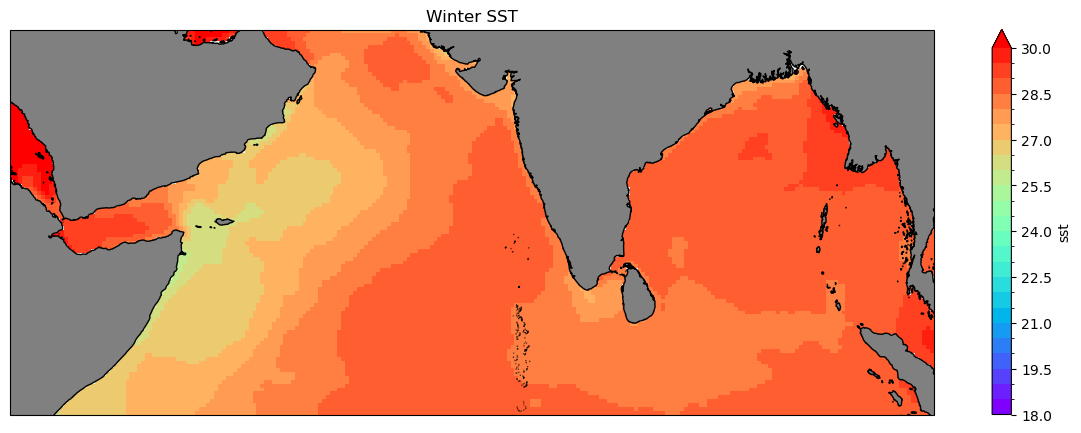

In [100]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
sst_winter.sst.plot(
    x="lon", y="lat", transform=ccrs.PlateCarree(), levels=np.linspace(18,30,25), cmap="rainbow"
)

coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Winter SST")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

## SSS Seasonal Mean

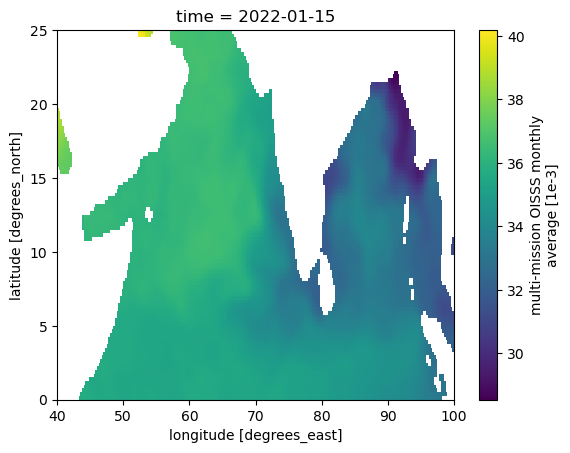

In [78]:
sss["sss"].isel(time=0).plot()

In [79]:
sss_spring = sss.sel(time=slice('2022-01-01', '2022-04-30')).mean('time')
sss_summer = sss.sel(time=slice('2022-05-01', '2022-08-31')).mean('time')
sss_winter = sss.sel(time=slice('2022-09-01', '2022-12-31')).mean('time')

In [80]:
sss_spring

<xarray.Dataset>
Dimensions:    (longitude: 240, latitude: 100)
Coordinates:
  * longitude  (longitude) float32 40.12 40.38 40.62 40.88 ... 99.38 99.62 99.88
  * latitude   (latitude) float32 0.125 0.375 0.625 0.875 ... 24.38 24.62 24.88
Data variables:
    sss        (latitude, longitude) float32 nan nan nan nan ... nan nan nan nan

Text(0, 0.5, 'Latitude')

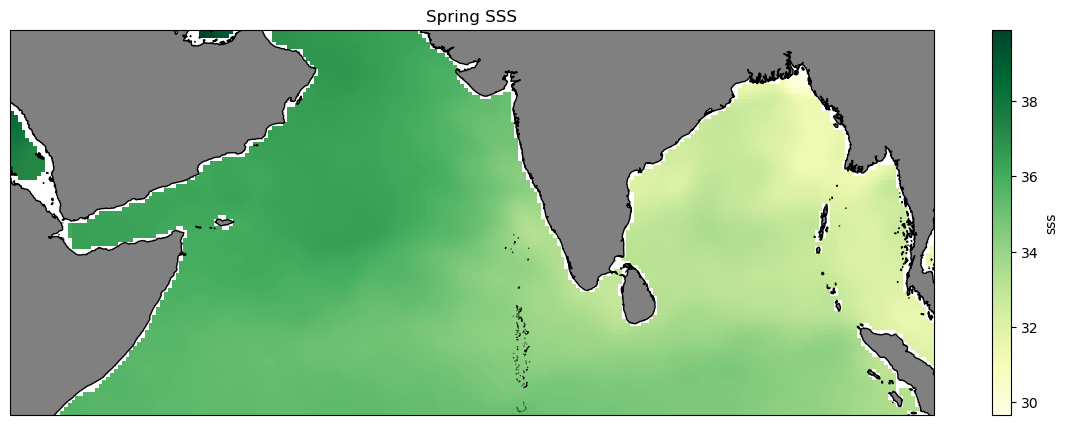

In [105]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
sss_spring.sss.plot(
    x="longitude", y="latitude", transform=ccrs.PlateCarree(), cmap="YlGn"
)

coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Spring SSS")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


Text(0, 0.5, 'Latitude')

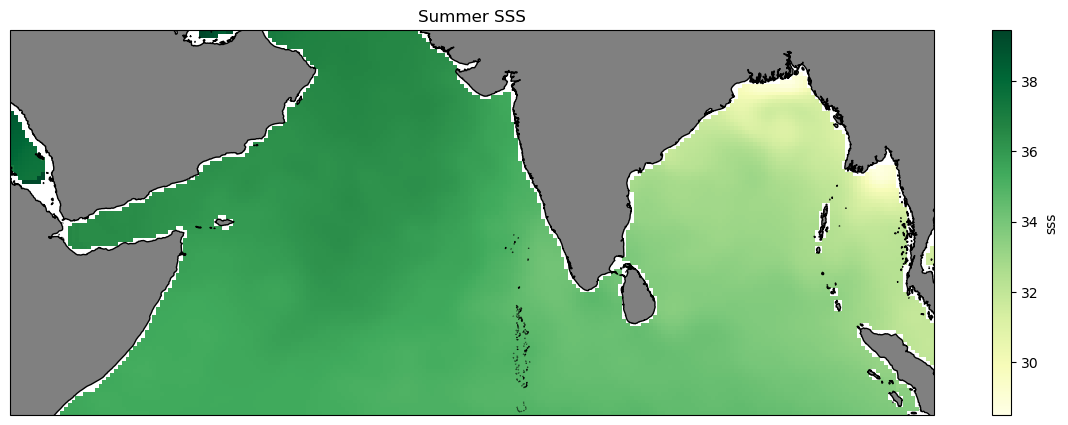

In [106]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
sss_summer.sss.plot(
    x="longitude", y="latitude", transform=ccrs.PlateCarree(), cmap="YlGn"
)

coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Summer SSS")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")


Text(0, 0.5, 'Latitude')

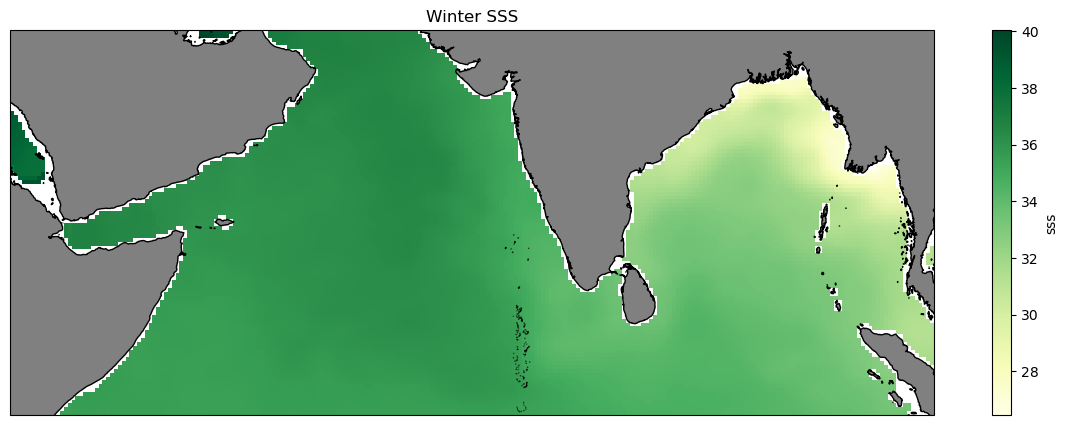

In [107]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=proj)
sss_winter.sss.plot(
    x="longitude", y="latitude", transform=ccrs.PlateCarree(), cmap="YlGn"
)

coast_10m = cfeature.NaturalEarthFeature(
    "physical", "land", "10m", edgecolor="k", facecolor="0.5"
)
ax.add_feature(coast_10m)
plt.title("Winter SSS")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
